In [58]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv('loan.csv')

In [60]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

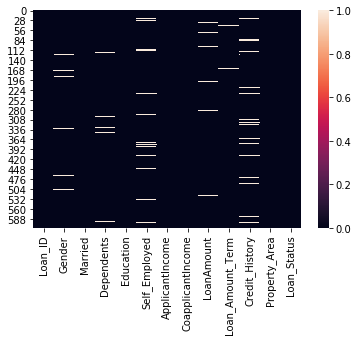

In [63]:
sns.heatmap(df.isnull())
plt.show()

In [64]:
from sklearn.impute import SimpleImputer

In [65]:
si = SimpleImputer(strategy = "most_frequent")

In [84]:
#using for loop to Impute values/...
for m in df:
    #if df[m].dtype =="object":
    df[m]=si.fit_transform(df[m].values.reshape(-1,1))

df.drop('Loan_ID', inplace = True, axis =1)

In [87]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

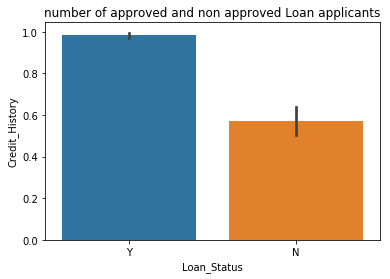

In [88]:
sns.barplot(df['Loan_Status'], df['Credit_History'])
plt.title("number of approved and non approved Loan applicants")
plt.show()


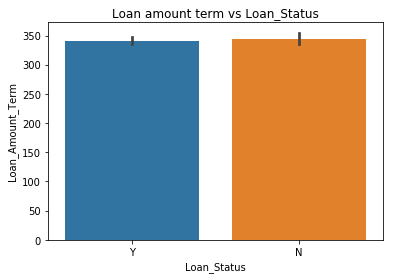

In [89]:
sns.barplot(df['Loan_Status'], df['Loan_Amount_Term'])
plt.title("Loan amount term vs Loan_Status")
plt.show()

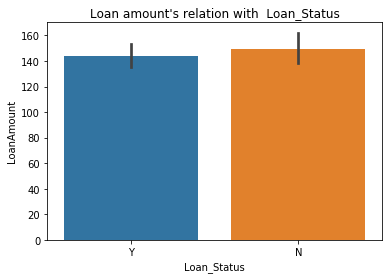

In [90]:
sns.barplot(df['Loan_Status'], df['LoanAmount'])
plt.title("Loan amount's relation with  Loan_Status")
plt.show()

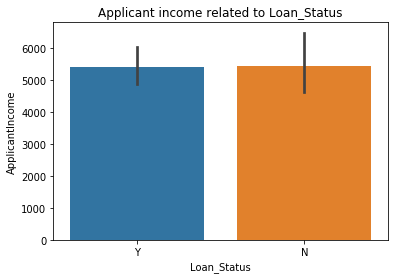

In [91]:
sns.barplot(df['Loan_Status'], df['ApplicantIncome'])
plt.title('Applicant income related to Loan_Status')
plt.show()

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for k in df.columns:
    if df[k].dtype == 'object':
        df[k] = le.fit_transform(df[k])

In [98]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x= df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.33, random_state=47)

In [99]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [105]:
mod = [RandomForestClassifier(), GradientBoostingClassifier(), xgboost.XGBClassifier()]
for g in mod:
    g.fit(x_train,y_train)
    print(g, g.score(x_train,y_train))
    predmod = g.predict(x_test)
    print(accuracy_score(y_test, predmod))
    print(confusion_matrix(y_test,predmod))
    print(classification_report(y_test,predmod))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.9829683698296837
0.7192118226600985
[[ 30  36]
 [ 21 116]]
              precision    recall  f1-score   support

           0       0.59      0.45      0.51        66
           1       0.76      0.85      0.80       137

   micro avg       0.72      0.72      0.72       203
   macro avg       0.68      0.65      0.66       203
weighted avg       0.71      0.72      0.71       203

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
       

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score

In [108]:
fpr, tpr,_= roc_curve(y_test, predmod)
fpr,tpr,_

(array([0.        , 0.57575758, 1.        ]),
 array([0.        , 0.91240876, 1.        ]),
 array([2, 1, 0]))

In [114]:
auc= roc_auc_score(y_test, predmod)
auc

0.6683255916832559

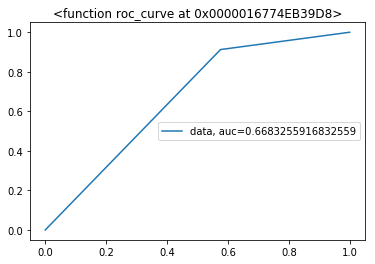

In [118]:
plt.plot(fpr,tpr, label="data, auc="+str(auc))
plt.title(roc_curve)
plt.legend(loc=5)
plt.show()

In [116]:
# saving model
import pickle
saved_model = pickle.dumps(mod[2]) 
backfromjup= pickle.loads(saved_model)


In [117]:
backfromjup.predict(x_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1])